In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,models,layers

In [2]:
(X_train,y_train),(X_test,y_test)= datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

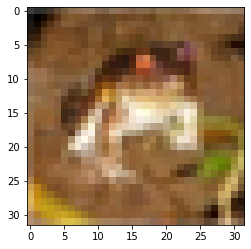

In [5]:
plt.imshow(X_train[0])

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
y_test=y_test.reshape(-1,)

In [18]:
 def plot_photos(X,y,index):
   plt.figure(figsize=(5,7))
   plt.imshow(X[index])
   plt.xlabel(classes[y[index]])
  

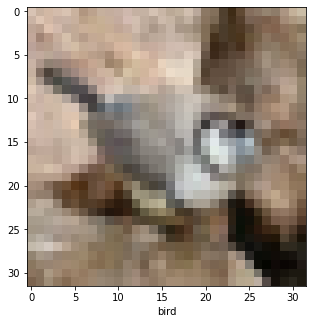

In [22]:
plot_photos(X_train,y_train,90)

In [23]:
X_train=X_train/255
X_test=X_test/255

In [24]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [31]:
print(y_test.shape)

(10000,)


 ANN TRAIL

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Activation


In [36]:
ann=Sequential()
ann.add(Flatten(input_shape=(32,32,3)))
ann.add(Dense(50,activation='relu'))
ann.add(Dense(20,activation='relu'))
ann.add(Dense(10,activation='softmax'))

ann.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
fit_model=ann.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.9626 - accuracy: 0.2787
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8138 - accuracy: 0.3389
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7709 - accuracy: 0.3542
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7481 - accuracy: 0.3588
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7343 - accuracy: 0.3653
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7261 - accuracy: 0.3703
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7141 - accuracy: 0.3752
Epoch 8/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7062 - accuracy: 0.3757
Epoch 9/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6985 - accuracy: 0.3820
Epoch 10/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.698

In [38]:
np.argmax(fit_model)

0

In [39]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.7003 - accuracy: 0.3755


[1.7002705335617065, 0.37549999356269836]

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=ann.predict_classes(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.3755


In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.41      0.44      1000
           1       0.42      0.60      0.49      1000
           2       0.30      0.17      0.21      1000
           3       0.24      0.26      0.25      1000
           4       0.31      0.25      0.28      1000
           5       0.40      0.18      0.25      1000
           6       0.31      0.67      0.42      1000
           7       0.49      0.39      0.43      1000
           8       0.44      0.53      0.48      1000
           9       0.47      0.29      0.36      1000

    accuracy                           0.38     10000
   macro avg       0.39      0.38      0.36     10000
weighted avg       0.39      0.38      0.36     10000



CNN TRAIL

In [46]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D


In [65]:
cnn=Sequential()
cnn.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D((2,2)))

cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [66]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4480 - accuracy: 0.4799
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1144 - accuracy: 0.6082
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9849 - accuracy: 0.6563
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9053 - accuracy: 0.6837
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8381 - accuracy: 0.7087
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7822 - accuracy: 0.7277
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7353 - accuracy: 0.7455
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6894 - accuracy: 0.7599
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6464 - accuracy: 0.7737
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.607

In [68]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9840 - accuracy: 0.6874


[0.9840136766433716, 0.6873999834060669]

In [70]:
y_pred=cnn.predict_classes(X_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.6874

In [72]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.29116408e-03, 1.81512733e-05, 8.79587233e-03, 9.31923926e-01,
        2.90697470e-04, 1.88625269e-02, 9.64677334e-03, 8.97919290e-06,
        2.91522089e-02, 9.64010451e-06],
       [3.32951546e-04, 2.15207622e-03, 3.88656019e-07, 8.74856099e-08,
        4.52513760e-09, 6.82414736e-10, 4.80516625e-12, 6.12423307e-11,
        9.97511506e-01, 2.92354275e-06],
       [1.50982097e-01, 5.08147180e-02, 1.36998118e-04, 3.22445703e-04,
        2.41347108e-04, 7.54772409e-05, 7.25806312e-05, 7.40936142e-04,
        7.59627998e-01, 3.69853862e-02],
       [8.73095214e-01, 2.11532600e-03, 6.48188463e-04, 9.00954474e-05,
        4.92173829e-04, 1.47483740e-06, 3.07475893e-05, 1.47891424e-05,
        1.23347804e-01, 1.64309546e-04],
       [9.81189442e-06, 1.07819833e-05, 6.56813337e-03, 6.19472051e-03,
        9.49891627e-01, 2.44202535e-03, 3.47965062e-02, 6.33433738e-05,
        2.03973505e-05, 2.62302706e-06]], dtype=float32)

In [81]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 8, 0, 4, 6, 1, 6, 4, 1]

In [82]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

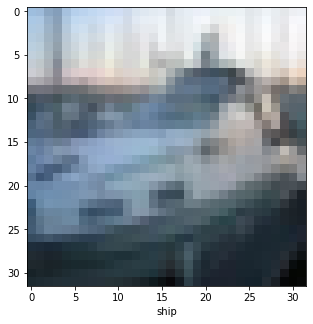

In [83]:
plot_photos(X_test,y_test,2)

In [84]:
print(classes[y_classes[2]])

ship
